## Community State Type Analysis

This notebook contains the steps to perform hierarchical clustering and derive community state type information for the VMET2 cohort.

In [1]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.spatial import distance
from sklearn.metrics import silhouette_samples
import matplotlib.ticker as ticker
from CST_Clustering import cluster16SMatrix, validateClusters

The hierarchical clustering will be performed on the data matrix with counts aggregated per species (sum of all OTUs for a given species). This file was generated separately with the *aggregateOTUs.py* script.

In [2]:
# Read the 16S count data matrix
counts_species = pds.read_csv('../../Data/16S Data/VMET2_16S_SpeciesMatrixFiltered.csv')

# Study clinical and demographic data
vmet2Metadata = pds.read_csv('../../Data/VMET2_Metadata.csv')

counts_species = vmet2Metadata.merge(counts_species, left_on='Seq_ID', right_on='Seq_ID')
# Select only the columns containing counts. The index starts at 21
counts_matrix = counts_species.iloc[:, 21::]

counts_matrix.index = counts_species['Seq_ID'].values
counts_matrix.index = counts_matrix.index.set_names('Seq_ID')

# Selecting the number of clusters - CST's

In the next cell, the "optimal" number of clusters is estimated using the silhouette score. 
The validateClusters function is defined separately in the *CST_Clustering.py* file.

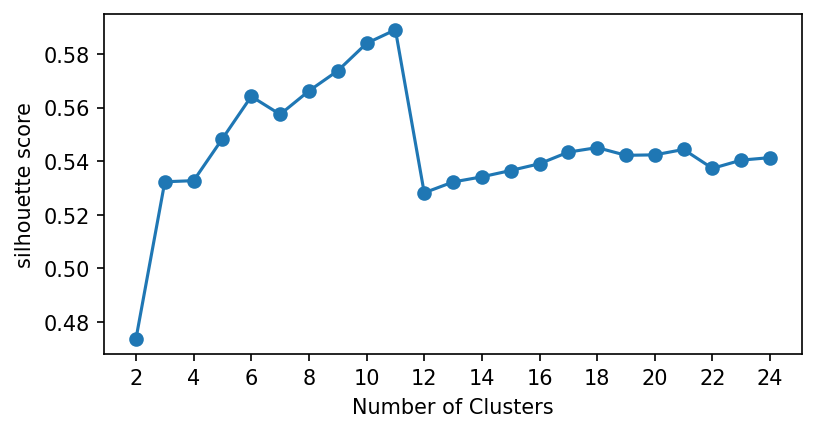

The suggested number of clusters is 11


In [3]:
cluster_validation = validateClusters(counts_matrix, distanceMetric='jensenshannon', clusterMethod='ward', method='silhouette')
fig, ax = plt.subplots(dpi=150, figsize=(6, 3))
ax.plot(cluster_validation[0], cluster_validation[1], '-o')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("{0} score".format(cluster_validation[2]))

fig.savefig('./Analysis Figures/VMET2_16S_SilhouetteValidation.png')
#fig.savefig('./Analysis Figures/VMET2_16S_SilhouetteValidation.eps')
plt.show()
print("The suggested number of clusters is {0}".format(cluster_validation[0][np.argmax(cluster_validation[1])]))

## Perform the Clustering of the CLR transformed 16S data matrix

Vaginal Community State types are obtained as described by Ravel et al[] performing Ward hierarchical clustering and using Jensen-Shannon divergence as distance metric.

Based on the silhouette score suggestion we 11 clusters.

In [ ]:
CST_Clustering = cluster16SMatrix(counts_matrix, nClusters=11, distanceMetric='jensenshannon', clusterMethod='ward')

### Heatmap plot with the clustering dendrogram

In [ ]:
nCST = len(CST_Clustering['clusterID'].unique())

# I light_blue # II light_green # III orange # IV red # V pink # VI grey # purple 
cst_colors_classic = ["#1a75ff", "#00b36b", "#cca300", "#ff3333", "#ff80d5", "#9494b8", "#9900cc"]
cmap_classic = ListedColormap(sns.color_palette(cst_colors_classic))


cmap = ListedColormap(sns.color_palette("deep", nCST))
row_colors = CST_Clustering['clusterID'].map(cmap)

#row_colors = CST_Clustering['clusterID'].map(cmap_)

cstMap = sns.clustermap(np.log(counts_matrix.values[:, 0:30].T + 1), col_linkage=CST_Clustering['LinkageMatrix'], 
                        row_cluster=False, yticklabels=counts_matrix.columns[0:30], 
                        col_colors=row_colors.values, cmap='viridis', xticklabels=False)


bottom, top = cstMap.ax_heatmap.get_ylim()
#cstMap.ax_heatmap.set_ylim(bottom - 0.25, top - 0.25)


cst_string_decode_classic = {0:'IV', 1:'I', 2:'III', 3:'IV', 4:'V', 
                     5:'V', 6:'VI', 7:'IV', 8:'IV', 9:'II', 10:'II'}


#cst_string_decode = {1:'I', 3:'V - Mix L. iners', 9:'V', 2:'IV - Gardnerella + L. iners', 4:'III', 
#                     5:'IV - Gardnerella + L. gasseri', 
#                     6:'IV - Mix Anaerobes', 7:'VI - Bifidobacterium', 
#                     8:'II', 0:'IV - Gardnerella', 10:'IV - L.gasseri + Atopobium'}


cst_string_decode = {0:'IV - Gardnerella + L. gasseri',
                     1:'I', 
                     2:'III',
                     3:'IV - Gardnerella',
                     4:'V',
                     5:'V - Mix L.iners',
                     6:'VI - Bifidobacterium',
                     7:'IV - Mix Anaerobes/Other Lactobacilli',
                     8:'IV - Gardnerella + L. iners',
                     9:'II',
                     10:'II - L.gasseri + Atopobium'}


#cst_string_decode = {0:'I', 1:'I', 2:''}

for label in [1, 9, 2, 4, 6, 7, 8, 0, 3, 5, 10]:
    cstMap.ax_col_dendrogram.bar(0, 20, color=cmap(label), label=cst_string_decode[label], linewidth=0)

cstMap.ax_col_dendrogram.legend(bbox_to_anchor=(1.5, 1), loc='upper center', ncol=2)

#cstMap.ax_col_dendrogram.set_position()

# Adjust the postion of the main colorbar for the heatmap
cstMap.cax.set_position([0.05, .3, 0.05, .2])
cstMap.cax.set_ylabel('Log(Counts + 1)')

cstMap.savefig('./Analysis Figures/VMET2_16S_CSTClustering.png', dpi=300)
plt.show()

In [ ]:
nCST = len(CST_Clustering['clusterID'].unique())

# I light_blue # II light_green # III orange # IV red # V pink # VI grey # VII purple 
cst_colors_classic = ["#1a75ff", "#00b36b", "#cca300", "#ff3333", "#ff80d5", "#9494b8", "#9900cc"]
cmap_classic = ListedColormap(cst_colors_classic)

#cmap = ListedColormap(sns.color_palette("deep", nCST))
#row_colors = CST_Clustering['clusterID'].map(cmap)

row_colors = CST_Clustering['clusterID'].map(cmap_classic)

cstMap = sns.clustermap(np.log(counts_matrix.values[:, 0:30].T + 1), col_linkage=CST_Clustering['LinkageMatrix'], 
                        row_cluster=False, yticklabels=counts_matrix.columns[0:30], 
                        col_colors=row_colors.values, cmap='viridis', xticklabels=False)

bottom, top = cstMap.ax_heatmap.get_ylim()
#cstMap.ax_heatmap.set_ylim(bottom - 0.25, top - 0.25)

cst_string_decode_classic = {0:'IV', 1:'I', 2:'III', 3:'IV', 4:'V', 
                     5:'V', 6:'VI', 7:'IV', 8:'IV', 9:'II', 10:'II'}


#cst_string_decode = {1:'I', 3:'V - Mix L. iners', 9:'V', 2:'IV - Gardnerella + L. iners', 4:'III', 
#                     5:'IV - Gardnerella + L. gasseri', 
#                     6:'IV - Mix Anaerobes', 7:'VI - Bifidobacterium', 
#                     8:'II', 0:'IV - Gardnerella', 10:'IV - L.gasseri + Atopobium'}


cst_string_decode = {0:'IV - Gardnerella + L. gasseri',
                     1:'I', 
                     2:'III',
                     3:'IV - Gardnerella',
                     4:'V',
                     5:'V - Mix L.iners',
                     6:'VI - Bifidobacterium',
                     7:'IV - Mix Anaerobes/Other Lactobacilli',
                     8:'IV - Gardnerella + L. iners',
                     9:'II',
                     10:'II - L.gasseri + Atopobium'}


#cst_string_decode = {0:'I', 1:'I', 2:''}

for label in [1, 9, 2, 4, 6, 7, 8, 0, 3, 5, 10]:
    cstMap.ax_col_dendrogram.bar(0, 20, color=cmap_classic(label), label=cst_string_decode_classic[label], linewidth=0)

cstMap.ax_col_dendrogram.legend(bbox_to_anchor=(1.5, 1), loc='upper center', ncol=2)

#cstMap.ax_col_dendrogram.set_position()

# Adjust the postion of the main colorbar for the heatmap
cstMap.cax.set_position([0.05, .3, 0.05, .2])
cstMap.cax.set_ylabel('Log(Counts + 1)')

cstMap.savefig('./Analysis Figures/VMET2_16S_CSTClustering.png', dpi=300)
plt.show()

To inspect the characteristic microbial composition of each cluster, we plot the mean relative abundances of the top 6 species per CST cluster.

In [ ]:
fig, ax = plt.subplots(4, 3, dpi=300, figsize=(15,30), sharey=True)
fig.delaxes(ax[3, 2])

for idx, cst in enumerate(CST_Clustering['ClusterAbundances']):
    
    sns.barplot(x=np.arange(0, 6), y=cst[1][0:6], **{'yerr':cst[2][0:6], 'error_kw':{'lolims':True}}, ax=ax[int(np.floor(idx / 3)), idx % 3])
    ax[int(np.floor(idx / 3)), idx % 3].set_xticklabels(cst[1][0:6].index, rotation='vertical', fontsize=10)
    ax[int(np.floor(idx / 3)), idx % 3].set_title("Cluster Number: {0}".format(str(cst[0] + 1)))

fig.tight_layout()

fig.savefig('./Analysis Figures/VMET2_16S_CSTClustering_SpeciesDescription.png')

### Assess the silhouette values for samples accross the 11 CST clusters

In [ ]:
silhFrame = pds.DataFrame({'Cluster':CST_Clustering['clusterID'], 'Silhouette':CST_Clustering['SilhouetteSamples']})

fig, ax = plt.subplots(dpi=300)
sns.swarmplot(data=silhFrame, x='Cluster', y='Silhouette', ax=ax)

fig.savefig('./Analysis Figures/VMET2_16S_CSTClustering_SilhouetteSamples.png')

### Assess the silhouette values for samples in the aggregated CST (I, II, III, IV, V and VI)

In [ ]:
distMat = distance.squareform(distance.pdist(counts_matrix.values, 'jensenshannon'))
silhouetteSamples = silhouette_samples(distMat, CST_Clustering['clusterID'].map(cst_string_decode_classic), metric='precomputed')

silhFrame = pds.DataFrame({'Cluster':CST_Clustering['clusterID'].map(cst_string_decode_classic), 
                           'Silhouette':silhouetteSamples})

fig, ax = plt.subplots(dpi=300)
sns.swarmplot(data=silhFrame, x='Cluster', y='Silhouette', ax=ax)

fig.savefig('./Analysis Figures/VMET2_16S_CSTClustering_Classic_SilhouetteSamples.png')

## Export the CST Assignments


After obtaining the Community State Type information with hierarchical clustering, we export a dataframe containing the results 

In [ ]:
CSTAssignments = pds.DataFrame({'CST_11':CST_Clustering['clusterID'].map(cst_string_decode), 
                                'CST':CST_Clustering['clusterID'].map(cst_string_decode_classic),
                                'SilhouetteValues':CST_Clustering['SilhouetteSamples']})

CSTAssignments.index = counts_matrix.index

Further to the CST classification, we specify a binary factor to discriminate samples where the vaginal microbial composition (VMC) is either dominated by Lactobacillus species (LDominant) or other species (LDepleted).

There are 2 approaches to assign samples as LDominant vs LDepleted based on VMC:

    1 - Based on the CST clusters derivded from HCA. Samples assigned to CST IV or CST VI (B. breve) are considered as "Lactobacillus Depleted". This is the main measured used in the manuscript.
    2 - Using the Relative Abundance of Lactobacillus Species counts in a microbial profile. Samples with a high proportion of Lactobacillus species counts are considered "Lactobacillus Dominant". A major limitation of this method is selection of a "good" cut-off point.

In [ ]:
# Find all Lactobacilli species
Lactobacillus_Species = [x for x in counts_matrix.columns if 'Lactobacillus' in x]

# Sum their counts
lacto_counts = counts_matrix.loc[:, Lactobacillus_Species].sum(1)
total_counts = counts_matrix.sum(1)
# Calculate the lactobacillus percentage
LactobacillusPercentage = (lacto_counts/total_counts)*100
CSTAssignments['LactobacillusPercentage'] = LactobacillusPercentage

# Histogram of the Lactobacilli species % accross samples.
# 85% was a manually selected cut-off for L. Dominant vs L. Deplted by inspection of the histogram
fig, ax = plt.subplots()
CSTAssignments.hist('LactobacillusPercentage', bins=100, alpha=0.7, ax=ax)
ax.axvline(x=85, color='red')
ax.set_title('Relative abundance % for Lactobacillus spp counts')
ax.set_ylabel('Count')
ax.set_xlabel('Relative abundance % of Lactobacillus spp counts')


CSTAssignments['LDominant_CST'] = 'LDominant'
CSTAssignments['LDominant_RelAbundance'] = 'LDominant'
# All CST IV samples are lactobacillus Depleted...
CSTAssignments.loc[CSTAssignments['CST'] == 'IV', 'LDominant_CST'] = 'LDepleted'
# As well as those from the Bifidobacterium breve cluster
CSTAssignments.loc[CSTAssignments['CST'] == 'VI', 'LDominant_CST'] = 'LDepleted'

# Using the Relative Abundance Criteria, samples with a relative abundance of less than 85 % are 
CSTAssignments.loc[CSTAssignments['LactobacillusPercentage'] <= 85, 'LDominant_RelAbundance'] = 'LDepleted'


**Other Lactobacillus species**

One of the clusters (Cluster number 8, labelled as "IV - Mix Anaerobes/Other Lactobacilli") contains a set of samples dominated by Lactobacillus spp other than *crispatus*, *iners*, *gasseri* or *jensenii*, such as *L. acidophilus* and *L.rhamnosus* mixed with other samples composed mainly of anaerobes and *Streptococcus*. We re-assign manually the Lactobacilli samples from this cluster to a new cluster, designated as CST 'VII' and also considered to be dominated by *Lactobacillus spp*

In [ ]:
other_Lactobacillus = 'Lactobacillus_acidophilus', 'Lactobacillus_rhamnosus', 'Lactobacillus_ultunensis', 'Lactobacillus_gallinarum'
counts_matrix.idxmax(1).isin(other_Lactobacillus).index

CSTAssignments.loc[counts_matrix.idxmax(1).isin(other_Lactobacillus), 'CST'] = 'VII'
# Ensure these samples are also considered Dominant per Lactobacillus
CSTAssignments.loc[counts_matrix.idxmax(1).isin(other_Lactobacillus), 'LDominant_CST'] = 'LDominant'

In [ ]:
CSTAssignments.to_csv('../../Data/VMET2_CSTAssignment.csv', index=True)